In [130]:
import os
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot

In [165]:
def my_precision(y_real, y_predicted):
    return tp(y_real, y_predicted)/(tp(y_real, y_predicted)+fp(y_real, y_predicted))   
def my_recall(y_real, y_predicted):
    return tp(y_real, y_predicted)/(tp(y_real, y_predicted)+fn(y_real, y_predicted))
def my_f1(y_real, y_predicted):
    return (tp(y_real, y_predicted)+tn(y_real, y_predicted))/(tp(y_real, y_predicted)+fp(y_real, y_predicted)+fn(y_real, y_predicted)+tn(y_real, y_predicted))

In [144]:
def tp(y_real, y_predicted):
    res = 0
    for i in range(len(y_real)):
        if y_real[i]== 1 and y_predicted[i] == 1:
            res+=1
    return res
    
def fp(y_real, y_predicted):  
    res = 0
    for i in range(len(y_real)):
        if y_real[i]== 0 and y_predicted[i] == 1:
            res+=1
    return res    
    
def tn(y_real, y_predicted):  
    res = 0
    for i in range(len(y_real)):
        if y_real[i]== 0 and y_predicted[i] == 0:
            res+=1
    return res

def fn(y_real, y_predicted):  
    res = 0
    for i in range(len(y_real)):
        if y_real[i]== 1 and y_predicted[i] == 0:
            res+=1
    return res

In [79]:
test = []
files = os.listdir("/Users/dariasamsonova/Machine Learning/aclImdb/test/neg") 
for file in files:
    with open("/Users/dariasamsonova/Machine Learning/aclImdb/test/neg/" + file, encoding = 'utf8') as f:   
        #print(f.readlines())
        test.append({"text" : f.read(), 'y' : 0})

In [80]:
files = os.listdir("/Users/dariasamsonova/Machine Learning/aclImdb/test/pos") 
for file in files:
    with open("/Users/dariasamsonova/Machine Learning/aclImdb/test/pos/" + file, encoding = 'utf8') as f:   
        #print(f.readlines())
        test.append({"text" : f.read(), 'y' : 1})

In [81]:
len(test)

25000

In [82]:
train = []

files = os.listdir("/Users/dariasamsonova/Machine Learning/aclImdb/train/pos") 
for file in files:
    with open("/Users/dariasamsonova/Machine Learning/aclImdb/train/pos/" + file, encoding = 'utf8') as f:   
        #print(f.readlines())
        train.append({"text" : f.read(), 'y' : 1})

In [83]:
files = os.listdir("/Users/dariasamsonova/Machine Learning/aclImdb/train/neg") 
for file in files:
    with open("/Users/dariasamsonova/Machine Learning/aclImdb/train/neg/" + file, encoding = 'utf8') as f:   
        #print(f.readlines())
        train.append({"text" : f.read(), 'y' : 0})

In [84]:
len(train)

25000

In [85]:
train_data = pd.DataFrame.from_records(train)

In [86]:
test_data =  pd.DataFrame.from_records(test)

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data.text) #Learn the vocabulary dictionary and return term-document matrix.
X_train_counts.shape

(25000, 74849)

In [155]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier().fit(X_train_counts, train_data.y)

accuracy=0.7158
F1=0.7166, Precision=0.7145, Recall=0.7187, ROC-AUC = 0.7158
my_precision = 0.7144902179099729, my_recall = 0.71872, my_f1 = 0.71576


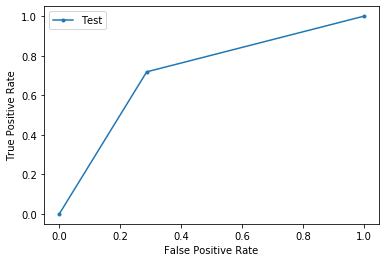

In [156]:
acc = accuracy_score(test_data.y, predicted)
f1 = f1_score(test_data.y, predicted)
precision = precision_score(test_data.y, predicted)
recall = recall_score(test_data.y, predicted)
roc_auc = roc_auc_score(test_data.y, predicted)
print('accuracy={0:1.4f}'.format(acc))
print('F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}, ROC-AUC = {3:1.4f}'.format(f1, precision, recall, roc_auc))
print("my_precision = {0}, my_recall = {1}, my_f1 = {2}".format(my_precision(test_data.y, predicted),my_recall(test_data.y, predicted), my_f1(test_data.y, predicted)))
fpr, tpr, _ = roc_curve(test_data.y, predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [157]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts,  train_data.y)
predicted = clf.predict(X_test)

accuracy=0.8136
F1=0.8006, Precision=0.8605, Recall=0.7484, ROC-AUC = 0.8136
my_precision = 0.8605464078741606, my_recall = 0.7484, my_f1 = 0.81356


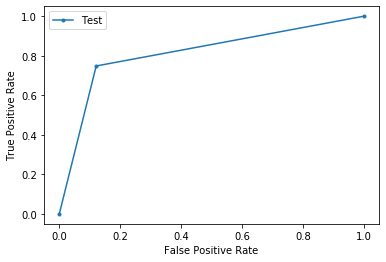

In [158]:
acc = accuracy_score(test_data.y, predicted)
f1 = f1_score(test_data.y, predicted)
precision = precision_score(test_data.y, predicted)
recall = recall_score(test_data.y, predicted)
roc_auc = roc_auc_score(test_data.y, predicted)
print('accuracy={0:1.4f}'.format(acc))
print('F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}, ROC-AUC = {3:1.4f}'.format(f1, precision, recall, roc_auc))
print("my_precision = {0}, my_recall = {1}, my_f1 = {2}".format(my_precision(test_data.y, predicted),my_recall(test_data.y, predicted), my_f1(test_data.y, predicted)))
fpr, tpr, _ = roc_curve(test_data.y, predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [174]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train_counts,  train_data.y)
predicted = clf.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy=0.8667
F1=0.8657, Precision=0.8726, Recall=0.8588, ROC-AUC = 0.8667
my_precision = 0.872622337831247, my_recall = 0.8588, my_f1 = 0.86672


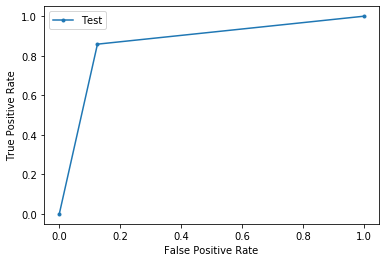

In [175]:
acc = accuracy_score(test_data.y, predicted)
f1 = f1_score(test_data.y, predicted)
precision = precision_score(test_data.y, predicted)
recall = recall_score(test_data.y, predicted)
roc_auc = roc_auc_score(test_data.y, predicted)
print('accuracy={0:1.4f}'.format(acc))
print('F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}, ROC-AUC = {3:1.4f}'.format(f1, precision, recall, roc_auc))
print("my_precision = {0}, my_recall = {1}, my_f1 = {2}".format(my_precision(test_data.y, predicted),my_recall(test_data.y, predicted), my_f1(test_data.y, predicted)))
fpr, tpr, _ = roc_curve(test_data.y, predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [176]:
from sklearn.metrics import *
X_test = count_vect.transform(test_data.text) # Extract token counts out of raw text documents using the vocabulary fitted with fit 
predicted = clf.predict(X_test)

predicted_proba = pd.DataFrame(clf.predict_proba(X_test), columns = ['neg', 'pos'])

In [177]:
test_data.text[predicted_proba.neg.nlargest(15).index]

542     Plankton, or Creatures from the Abyss as I'm p...
895     Interferencia starts as unemployed Martin Sand...
1066    Rose  Does anything actually happen in this e...
1547    Okay wait let me get this street, there are ac...
2915    Mom begins at night in the middle of nowhere, ...
3615    My qualifications for this review? I own all t...
3712    Kairo, or Pulse as it's known amongst English ...
3970    It is the early morning of our discontent, and...
5323    A pretentious but - to varying degrees - watch...
5570    The Bone Collector is set in New York City & s...
5614    Snake Island is one of those films that, whils...
5664    Curse of the Wolf starts as reluctant Werewolf...
6571    By the mid 1990s, the career of animator-direc...
6716    Komodo vs. Cobra starts as 'One Planet' enviro...
6832    I think the cards were stacked against Webmast...
Name: text, dtype: object

In [178]:
test_data.text[predicted_proba.pos.nlargest(15).index]

13165    Universal Studios version of "Flipper" (1996) ...
16938    1904. The North African nation of Morocco is h...
18703    The Hand of Death aka Countdown in Kung Fu (19...
20622    Tony Hawk's Pro Skater 2x, isn't much differen...
22063    This is a great German slasher, that's often q...
23080    The Hand of Death aka Countdown in Kung Fu (19...
16520    OZ is the greatest show ever mad full stop.OZ ...
20134    This is one of the funniest movies I've ever s...
13058    Wallace and Gromit are the main characters in ...
18607    Director Mikhail Kalatozov's film The Cranes a...
22796    Anthony Minghella's 'The English Patient' is a...
13084    This is a surprisingly great low budget Horror...
23804    Over the weekend i watched the movie Tipping t...
15484    Many years ago I saw this movie (on television...
13927    Life is comprised of infinite possibilities; s...
Name: text, dtype: object

In [161]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_counts,  train_data.y)
predicted = clf.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy=0.8458
F1=0.8441, Precision=0.8532, Recall=0.8352, ROC-AUC = 0.8458
my_precision = 0.8532200065380844, my_recall = 0.8352, my_f1 = 0.84576


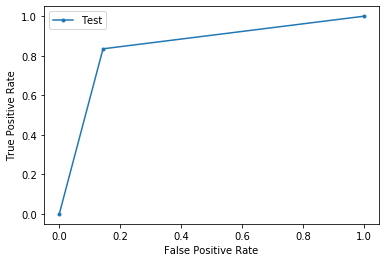

In [162]:
acc = accuracy_score(test_data.y, predicted)
f1 = f1_score(test_data.y, predicted)
precision = precision_score(test_data.y, predicted)
recall = recall_score(test_data.y, predicted)
roc_auc = roc_auc_score(test_data.y, predicted)
print('accuracy={0:1.4f}'.format(acc))
print('F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}, ROC-AUC = {3:1.4f}'.format(f1, precision, recall, roc_auc))
print("my_precision = {0}, my_recall = {1}, my_f1 = {2}".format(my_precision(test_data.y, predicted),my_recall(test_data.y, predicted), my_f1(test_data.y, predicted)))
fpr, tpr, _ = roc_curve(test_data.y, predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [163]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train_counts,  train_data.y)
predicted = clf.predict(X_test)

accuracy=0.7163
F1=0.7171, Precision=0.7150, Recall=0.7193, ROC-AUC = 0.7163
my_precision = 0.7149900596421471, my_recall = 0.71928, my_f1 = 0.71628


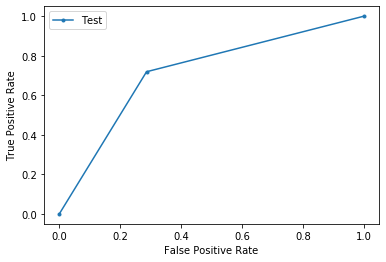

In [164]:
acc = accuracy_score(test_data.y, predicted)
f1 = f1_score(test_data.y, predicted)
precision = precision_score(test_data.y, predicted)
recall = recall_score(test_data.y, predicted)
roc_auc = roc_auc_score(test_data.y, predicted)
print('accuracy={0:1.4f}'.format(acc))
print('F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}, ROC-AUC = {3:1.4f}'.format(f1, precision, recall, roc_auc))
print("my_precision = {0}, my_recall = {1}, my_f1 = {2}".format(my_precision(test_data.y, predicted),my_recall(test_data.y, predicted), my_f1(test_data.y, predicted)))
fpr, tpr, _ = roc_curve(test_data.y, predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()